## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Storyline


Background: Agriculture plays an important role in supplementing the global food supply. To increase food security and reduce the impact of climate change, an understanding of worldwide crop yield is becoming increasingly essential.
The prediction of crop yield is one of the most critical agricultural traits in current times of looming climate change conditions. The primary deciding factors for future prediction of yield are temperature, rainfall, pesticide amount, as well as prior information on crop yield.  

##### Link to the dataset: https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv

Story outline: The dataset consist of country-wise yield data of top ten most consumed crops worldwide. In the current exercise, I am planning to visualize the data and fit a model for prediction of crop-yield using machine learning models based on values of features such as environmental factors (temperature, rainfall) and agriculture practices (pesticide amount) (Linear Regression and Decision Tree). Subseqeuntly, I aim to calculate the accuracy of both models. Lastly, for all features, feature importance are plotted in the order of decreasing importance in decision making of predicting crop yield.

## Step 2: Remember the Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

The focused audience of my story span from generalists (they are aware of the content’s topic and looking for a general
comprehension), managers (who would seek an overall result-oriented understanding of the specifics), and experts (who would want less storytelling and more in-depth analyses) as per '101 guide pdf'

They will have an understanding about the important factors deciding corp yield and which model may work well in such yield predictions.

## Step 3: Stage the Data

In [10]:
!pip install pandas plotnine # installation of plotline to make use of ggplot
from plotnine import * 
import pandas as pd
import numpy as np
from sklearn import linear_model # necessary package for linear regression
import seaborn as sns
import matplotlib.pyplot as plt #for visualization
from sklearn.model_selection import train_test_split #for ml training and tesing split
from sklearn.linear_model import LinearRegression  
from sklearn import tree # package for decision tree


with open('./myData/yield_df.csv') as file:
    df = pd.read_csv(file)
print(df.dtypes)
print(df)

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year      int64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object
       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142  

## Step 4: Vet Data Sources

In initial steps, I started with data preproccessing to check if there are null values in the dataset. Furthermore, some feature names (column names) were renamed for better readability and understanding.

In [11]:
df=df.dropna(axis=0, how='all')  #dropping all rows where are completely empty
null_data = df.isnull().sum() #summing up all null vales
print(null_data) #printing the data
#There is no NA and NULL values in the dataset. It is a clean dataset
df=df.drop(['Unnamed: 0'], axis=1) #removing the first column from the dataset
print('\n \nAfter renaming \n\n')
df.rename(columns = {'hg/ha_yield':'yield', 'average_rain_fall_mm_per_year':'avg_rain','pesticides_tonnes':'pesticide', 'Item':'Crop','Area':'Country'}, inplace = True)
print(df.dtypes) #above line I have renamed few columns for better usability then printed
#Since, my data was already clean, I have still checked for if there is any null value.

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

 
After renaming 


Country       object
Crop          object
Year           int64
yield          int64
avg_rain       int64
pesticide    float64
avg_temp     float64
dtype: object


Next step involves exploratory data analysis.
Firstly, I explored the relationships between all the features (column names) of the dataset, a good way to quickly check correlations among columns by visualizing the correlation matrix as a heatmap.

Text(0.5, 1, 'Correlation Heatmap')

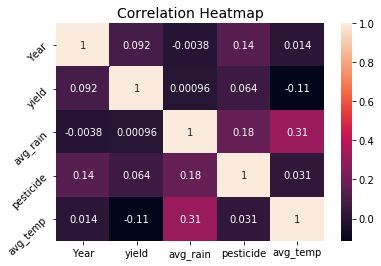

In [12]:
#checking the correlation matrix, to know that how columns are corelated
df_corr = df.corr() #caculation of correlation
ax = sns.heatmap(df_corr, annot=True) #plot in a heatmap
bottom, top = ax.get_ylim() #limit set up
ax.set_ylim(bottom + 0.5, top - 0.5) #setting up limit for better visualization
ax.set_yticklabels(ax.get_yticklabels(),rotation=45,horizontalalignment='right')#changing y columns labels direction
ax.set_title('Correlation Heatmap',fontsize = 14)#adding title for the plot

It can be observed from the correlation matrix that there is no significant correlation among the features (column names).

Next, I visualized crop-wise total yield. Using this, we can visualize magnitude of yield among different crops. 

                   Crop      yield
3              Potatoes  854351426
7        Sweet potatoes  344077024
0               Cassava  307730510
1                 Maize  149633801
4           Rice, paddy  137994713
8                 Wheat  116158445
9                  Yams   96676873
2  Plantains and others   58958974
5               Sorghum   56634127
6              Soybeans   53924312


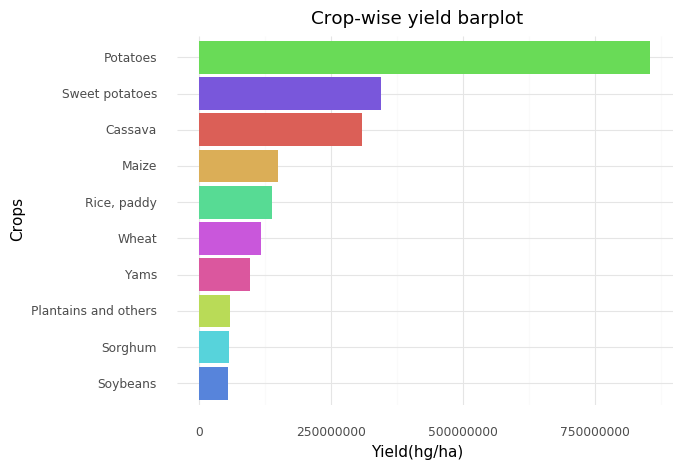

<ggplot: (-9223363292671489336)>

In [13]:
#Representation of crop as per yield 
df1=df.groupby(['Crop'])['yield'].aggregate('sum').reset_index(name='yield') #creation of dataframe based on cropwise yield
df_1=df1.sort_values(by=['yield'], ascending=False) #Sorting of values as per order of yield
print(df_1) #printing

p=ggplot(df_1, aes(x='Crop',y='yield',fill='Crop'))+ geom_bar(stat="identity")+theme_minimal()+coord_flip()+ scale_x_discrete(limits=df_1['Crop'].tolist()[::-1]) #plotting yield and crop using ggplot
p=p+guides(fill = False, color = False, linetype = False, shape = False)#removing redundant legends 
p+labs(title = "Crop-wise yield barplot",x = "Crops", y = "Yield(hg/ha)") #adding up title and labels to thr x and y axis

The next plot helped us to visualize increase in usage of pesticides over the years. This would help us check later if this feature has any impact on yield or not. 

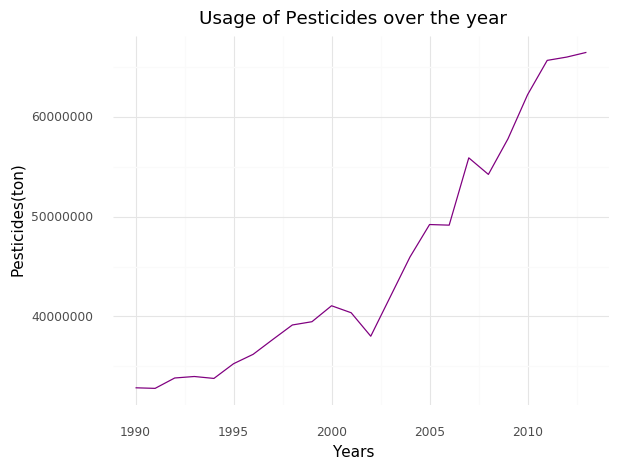

<ggplot: (8744239332921)>

In [14]:
#visualization of how use of pesticides increased in years
df_py=df.groupby(['Year'])['pesticide'].aggregate('sum').reset_index(name='pesticide') #creating dataframe yearwise total pesticide used
#df_1=df1.sort_values(by=[''], ascending=False)
#print(df_1)
ggplot(df_py, aes('Year','pesticide'))+ geom_line(colour='purple')+theme_minimal()+labs(title = "Usage of Pesticides over the year",x = "Years", y = "Pesticides(ton)")
#ploting pasticide vs year using ggplot, changing of colour,theme, title, labels for better visualization

From the above plot it could be inferred that usage of pesticides has increased drastically over time. I wondered if there is any impact on crop yield due to this increased pesticide usage with time.
Therefore, I visualized changes in crop-wise yield over time using a line-plot.

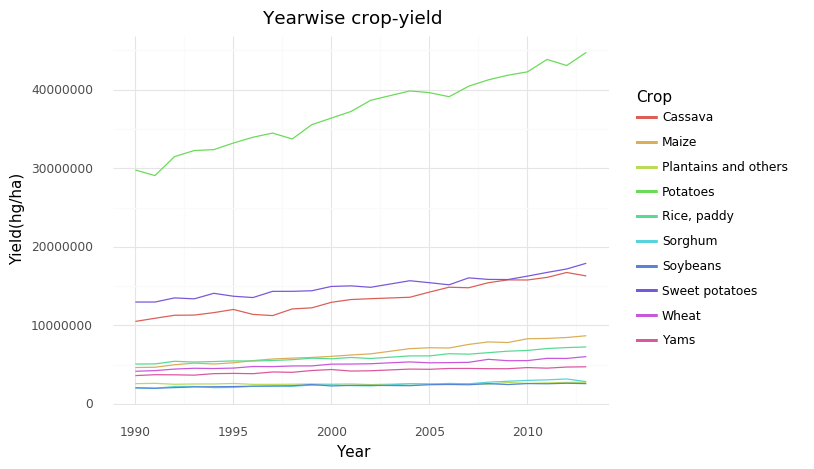

<ggplot: (-9223363292580611426)>

In [15]:
#how crop production changed in years
df2 = df.groupby(['Crop','Year'])['yield'].aggregate('sum').reset_index(name='yield') #creating dataframe for crops,yield according to year
ggplot(df2,aes(x='Year', y='yield', colour='Crop')) + geom_line()+theme_minimal()+ labs(title = "Yearwise crop-yield",x = "Year", y = "Yield(hg/ha)")
#ploting of the data using ggplot where in x axis year and in y axis yield are considered and color has been chosen crop-wise

It can be seen from the above plot that yield of potato has increased drastically followed by sweet potato and yam at the second and the third spot.

To further explore statistical detail from the barplot for yield for each crop, I further looked at the boxplot to visualize the  yield for each crop.

Text(0.5, 1.0, 'Crop-wise yield boxplot')

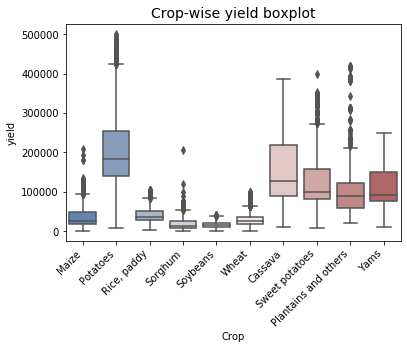

In [16]:
#Box plot, to check the significance of different crops
fig, ax = plt.subplots() 
sns.boxplot(x="Crop",y="yield",palette="vlag",data=df,ax=ax) #box plot of crops
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right') #changing the labels of x axis
ax.set_title('Crop-wise yield boxplot',fontsize = 14)#adding title and frontsize of it

It can be observed from the boxplot that Potato is the most produced crop in terms of yield followed by Cassava, Sweet potatoes and Yams. Significance will be explored in more detail post model-fitting.

Lastly, I looked at the country-wise crop-yield. In addition, I also visualized crop- and country-wise yield patterns (top 10).

In [17]:
df_c=df.groupby(['Country'])['yield'].sum().nlargest(10).reset_index(name='Yield')#Country wise total yield
print(df_c)


          Country      Yield
0           India  327420324
1          Brazil  167550306
2          Mexico  130788528
3           Japan  124470912
4       Australia  109111062
5        Pakistan   73897434
6       Indonesia   69193506
7  United Kingdom   55419990
8          Turkey   52263950
9           Spain   46773540


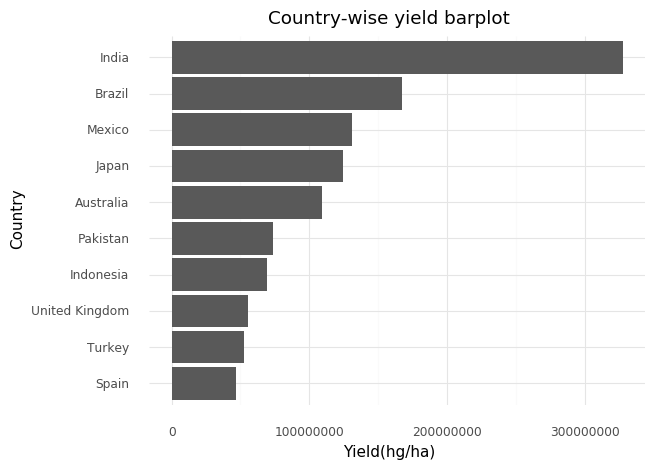

<ggplot: (8744239368375)>

In [18]:
p=ggplot(df_c,aes(x='Country',y='Yield'))+ geom_bar(stat = "identity")+theme_minimal()+coord_flip()+ scale_x_discrete(limits=df_c['Country'].tolist()[::-1]) #plotting yield and country using ggplot
p+labs(title = "Country-wise yield barplot",x = "Country", y = "Yield(hg/ha)") #adding up title and labels to the x and y axis

In [19]:
print(df.groupby(['Crop','Country'])['yield'].sum().nlargest(10).reset_index(name='Yield')) # 10 highest yield crop and country wise 

             Crop         Country      Yield
0         Cassava           India  142810624
1        Potatoes           India   92122514
2        Potatoes          Brazil   49602168
3        Potatoes  United Kingdom   46705145
4        Potatoes       Australia   45670386
5  Sweet potatoes           India   44439538
6        Potatoes           Japan   42918726
7        Potatoes          Mexico   42053880
8  Sweet potatoes          Mexico   35808592
9  Sweet potatoes       Australia   35550294


## Step 5: Filter Results and Build and Validate Models

Modeling phase 1: (Data Carpentry: Preparation of data for modeling)
Changing categorical variable: In this dataset there are two features (crop, country) consist of categorical variables (label values). Modeling cannot work on categorical variables which is why those variables should be converted to numerical category to feed to the model. Here, I have used get_dummies() to achieve this. It created a binary column for each category and returns a matrix with results. Then, data is seperated into training and test datasets. The training dataset is the intial dataset used to train ML algorithm to learn and produce accurate predictions. I have considered 70:30 split of the orginial dataset for generating training and testing datasets. I have built fit models to predict yield with respect to other features (columns) of the dataset.

In [20]:
#In this phase at first I have created dummy() to change categorical variable country and crops then renamed it.
#In phase 2 I have seperated training and tasting data in 70:30 randomly.
df_dummy = pd.get_dummies(df, columns=['Country','Crop'], prefix = ['Country','Crop']) #creating dummy columns from country and crop and renaming
#print(df_dummy)
cols=df_dummy.loc[:, df_dummy.columns != 'yield'] #not including yield and creating list of rest of the columns 
cols = cols.drop(['Year'], axis=1) #dropping year column from my analysis
column_names = list(cols.columns) #list creation of column names
#print(column_names)
X = df_dummy[column_names] #data creation from the updated columns(excepy yield) for training
y = df_dummy['yield'] #data creation using yield column for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1) #spliting training and testing data

Modeling phase 2:
Linear Regression model was applied to the dataset.

In [21]:
#Modelling Phase:2, application of linear regression model
model = LinearRegression() #calling linear regression function
model.fit(x_train, y_train) #fitting the model
#print(model.coef_)
#print(model.intercept_)
predictions = model.predict(x_test) #prediction using testing data

In [22]:
# printing actual, predicted values with their difference for linear regression model  
pred_df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions,'Difference':y_test-predictions}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df1) #printing

       Actual Value  Predicted Value    Difference
26326         23521     31740.415668  -8219.415668
26971         71988     60700.765410  11287.234590
1599         250797    168942.647442  81854.352558
21555          2244     13016.238406 -10772.238406
3284          19757      7200.198399  12556.801601
...             ...              ...           ...
11695         80716    125488.505177 -44772.505177
11368         23796     26362.605705  -2566.605705
7825          20000    -25468.301824  45468.301824
21181        110000    154421.977516 -44421.977516
10821         83453    126674.698539 -43221.698539

[5649 rows x 3 columns]


Modeling phase 3: Decision Tree model was applied to the dataset.

In [23]:
#Model phase 3: Application of Decision Tree model
clf = tree.DecisionTreeClassifier() #calling decision tree 
clf = clf.fit(x_train, y_train) #fitting the model
y_pred = clf.predict(x_test) #prediction using testing data
features=clf.feature_importances_ #selecting important features
z = sorted(zip(column_names, features), key=lambda x: x[1], reverse=True) #sorting the features and embeding with the column names
list(z)

[('pesticide', 0.5333480418328742),
 ('avg_temp', 0.27514272709371035),
 ('Crop_Maize', 0.02660359967934418),
 ('Crop_Potatoes', 0.025485569301233787),
 ('Crop_Sweet potatoes', 0.022886303071422018),
 ('Crop_Wheat', 0.022542283282001304),
 ('Crop_Rice, paddy', 0.019931305853978287),
 ('Crop_Soybeans', 0.01837363837879207),
 ('Crop_Sorghum', 0.01603260411262953),
 ('Crop_Cassava', 0.009182287592089024),
 ('Crop_Yams', 0.004195814899856515),
 ('avg_rain', 0.004193038622388229),
 ('Crop_Plantains and others', 0.0026464979947893033),
 ('Country_Argentina', 0.0008333477283941976),
 ('Country_India', 0.0007083378726918942),
 ('Country_Cameroon', 0.0006346108156484603),
 ('Country_Uruguay', 0.0005990603838183998),
 ('Country_Peru', 0.0005498407888966015),
 ('Country_Brazil', 0.0005380090822643149),
 ('Country_Burkina Faso', 0.0004861686908007253),
 ('Country_Burundi', 0.000382229921587194),
 ('Country_Rwanda', 0.00036963045192514376),
 ('Country_Albania', 0.00033965225538873183),
 ('Country_M

In [24]:
# printing actual, predicted values with their difference for linear regression model 
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df) #printing

       Actual Value  Predicted Value  Difference
26326         23521            24180        -659
26971         71988            71988           0
1599         250797           250797           0
21555          2244             3435       -1191
3284          19757            19757           0
...             ...              ...         ...
11695         80716            80716           0
11368         23796            23796           0
7825          20000            20000           0
21181        110000            70188       39812
10821         83453            83453           0

[5649 rows x 3 columns]


## Step 6: Visualize Results

Accuracy comparison between the two models: In this segment I have tried to calculate different error measures between the two models plotted those for better understanding.
The mean squared error of an estimator measures the average of the squares of the errors, which means the difference between the observed and predicted yield values.
The mean absolute error (MAE) is a quantity used to measure how close my predictions are to the final observed outcomes. The mean absolute error is an average of the all absolute errors.
Basically, the difference between observed and predicted values which is called residuals, and is used in the calculation of Root Mean Square Error and Mean Absolute Error.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

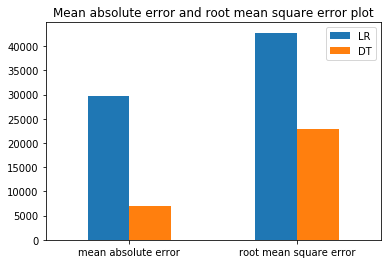

In [25]:
from math import sqrt
from sklearn import metrics

#print(r2lr)
#print(r2dt)

#error measures for linear regression
maelr=metrics.mean_absolute_error(y_test, predictions) #meam absolute error for linear regression
mselr=metrics.mean_squared_error(y_test, predictions) #mean squared error for linear regression
rmslr=metrics.root_mean_squared_error = sqrt(mselr) #root mean squared for linear regression


#error measures for decision tree
maedt=metrics.mean_absolute_error(y_test, y_pred) #meam absolute error for decision tree
msedt=metrics.mean_squared_error(y_test, y_pred) #meam squared error for decision tree
rmdt=metrics.root_mean_squared_error = sqrt(msedt) # root meam square error for decision tree

#mean squre plot
ploterror1=pd.DataFrame({"LR":[maelr,rmslr],"DT":[maedt,rmdt]},index=["mean absolute error","root mean square error"]) #creating dataframe to compute result
ploterror1.plot(kind="bar") #plotting using pandas plot
plt.title("Mean absolute error and root mean square error plot") #including plot title
plt.xticks(rotation = 360)# changing the label's direction

From the above visualization, it can be noted that the error rate for linear regression model is higher than for decision tree model. Therefore, I will calculate R squared value also so that I can decide which model works better for my chosen dataset.

R squared plot shows about how well the value data points fit a curve or line in a model. It is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data, it has been fitted to. If it is 1, the model should completely and accurately (100%) predict the data variance. On the other hand, if it is 0, the model would completely fail to predict the variance.

(array([0]), <a list of 1 Text xticklabel objects>)

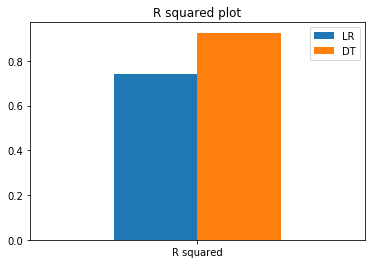

In [26]:
r2lr =metrics.r2_score(y_test,predictions) #R squared for linear regression
r2dt =metrics.r2_score(y_test,y_pred) #R squared for decision tree
#r square plot
ploterror2=pd.DataFrame({"LR":[r2lr],"DT":[r2dt]},index=["R squared"]) #creating dataframe to compute result
ploterror2.plot(kind="bar") #plotting using pandas plot
plt.title("R squared plot") #including plot title
plt.xticks(rotation = 360)#changing the label's directions

From the above barplot visualization of R squared value for the two fit models, we can conclude that decision tree classifier has predicted values in the test dataset more accurately as compared to the linear regression classifier.

Now, it's time to visualize the two models as per the two ML algorthims, LR and DT. Here, observed values vs predicted values are plotted in a scatter plot for both the models.

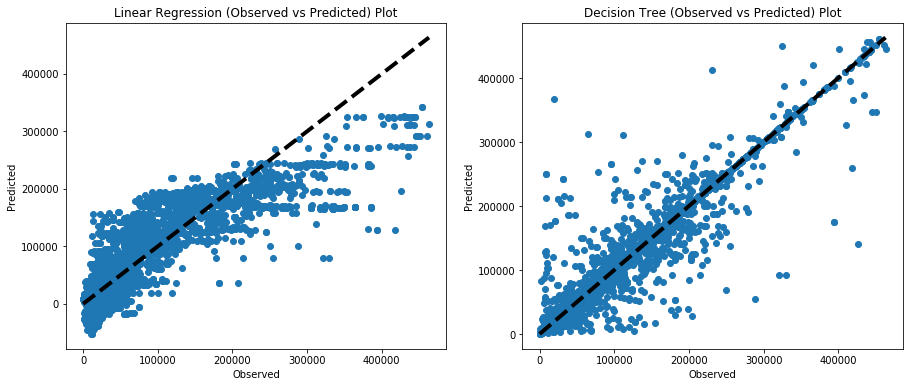

In [27]:
# Actual vs predicted plot, In this part I have plotted actual points and predicted points to visualize the accuracy of both the models
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6)) #creating axes for grid plot
#for linear regression
ax1.scatter(y_test, predictions) #plotting a scatter plot 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
ax1.set_xlabel('Observed') #setting label for x axis
ax1.set_ylabel('Predicted') #setting label for y axis
ax1.set_title('Linear Regression (Observed vs Predicted) Plot') #setting title

#for decision tree
ax2.scatter(y_test, y_pred) #plotting a scatter plot 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating line
ax2.set_xlabel('Observed')  #setting label for x axis
ax2.set_ylabel('Predicted')  #setting label for y axis
ax2.set_title('Decision Tree (Observed vs Predicted) Plot') #setting title
plt.show()

We can clearly see that in decision tree all the data-points are close to the regression diagonal line (black). If the model has a high R squared value, all the points will be close to the diagonal. The lower the R Squared, the weaker the "Goodness of fit" to the model, the more scattered/dispersed points are from the regression diagonal line (black). So, if the two plots are compared, in decision tree plot points are more close to regressor line as compared to in the linear regression plot.

Lastly, in this feature selection plot, I have plotted 15 important features (column names), which could have a direct effect on the model.

                      feature  importance
0                   pesticide    0.533348
1                    avg_temp    0.275143
2                  Crop_Maize    0.026604
3               Crop_Potatoes    0.025486
4         Crop_Sweet potatoes    0.022886
5                  Crop_Wheat    0.022542
6            Crop_Rice, paddy    0.019931
7               Crop_Soybeans    0.018374
8                Crop_Sorghum    0.016033
9                Crop_Cassava    0.009182
10                  Crop_Yams    0.004196
11                   avg_rain    0.004193
12  Crop_Plantains and others    0.002646
13          Country_Argentina    0.000833
14              Country_India    0.000708


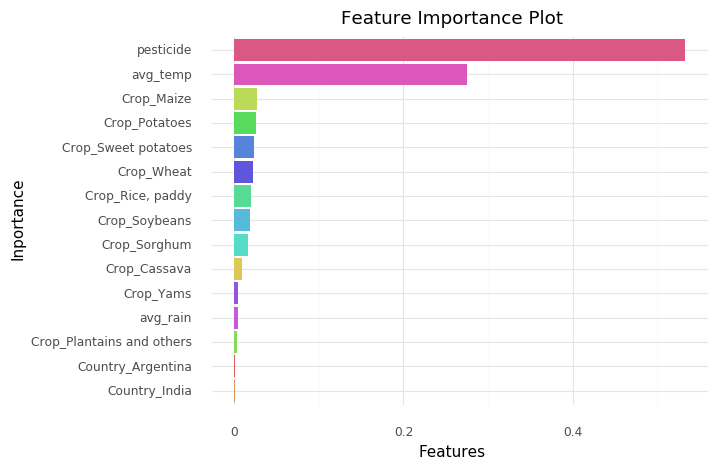

<ggplot: (-9223363292674553989)>

In [28]:
 top_features = sorted(zip(column_names,features), key=lambda x: x[1], reverse=True) #zipping column names with features
f_df=pd.DataFrame(top_features[:15]) #making dataframe with the top 15 values
f_df.columns = ['feature', 'importance'] #renaming columns
print(f_df) #printing
p1=ggplot(f_df, aes('feature','importance', fill='feature'))+ geom_bar(stat="identity")+theme_minimal()+ coord_flip()+scale_x_discrete(limits=f_df['feature'].tolist()[::-1])
p1+guides(fill = False, color = False, linetype = False, shape = False)+ labs(title = "Feature Importance Plot",x = "Inportance", y = "Features")
#plotting of those top 15 featues 

Pesticides are having the highest importance in the decision making of yield-prediction. The second important feature is average temperature followed by crop types maize, potato, sweet potato. This makes sense, since those are highly produced crops that we observed earlier. Overall, the assumption about these features seem correct with all of them are having impact on the expected crops yield in the model.

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

In this dataset, crop yield for different countries is provided along with other features such as average rainfall, avergae temperature, pesticide usage data in a country-wise and year-wise manner. However, a strong correlation could not be observed between any of the features. A correlation value of 0.31 could be observed between the average rainfall and the average temperature.
Potatoes were mostly grown among all crops and its production also increased over the years in terms of yield. Yield of other crops also increased over the years as seen from boxplot statistical visualization. Features such as average rainfall, avergae temperature and pesticide usage could be repsonsible for this. The plot data for avergae temperature and rainfall could not be appropriatley plotted since these values does not vary by year for most countries. However, a strong increase in pesticide usage over time could be seen.
To assess if indeed pesticide usage increase could have led to the increase in crop yield, two fit mpdels in machine learning algorithms were employed and clearly both decision tree and linear regression models were appropriate models for this dataset in crop yield prediction. However, decision tree came out as a winner in being a superior model for crop yield prediction. 
As assumed above, indeed, pesticide usage was the more important feature in predicting crop yield followed by avergae temperature.
![pic2.png MISSING](../images/pic2.png)
This could be an effect of the green revolution efforts where more use of chemicals such as fertilizers, pesticides and herbicides were encouraged. Thus our analyses also makes sense with the agricutural improvements and the reasons behind the dramatic increase in crop yields globally. Such kind of analsyes are crucial to predict agricultural food production in the future where global climate changes can be observed and global warming is approaching us faster than we thought. This would help us modify our agricultural practices and inputs as per the desired yield output to feed the ever-growing population.

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



A typical DSA project life cycle consist of 8 following steps

**Project defination, requirements and expectations:** Selection of appropriate project and then what exactly is to be done in part of stage 1. I went through many databases like kaggle, uci etc for datasets and chose crop-yield prediction dataset. I felt the topic relevent.

**Data acquisition, governance,curation & source code management:** Selecting the topic, I tried to explore about the overview of data for better understanding. There are many stories hiding in a data. Next, I decided about the language and I have choosen python for the project. 

**Data shaping and carpentry:** In this stage, as per the rule (never assume that data is clean), I have cleaned the dataset. First step, checked wheather any null/na values are there. The data was already clean. So, I have renamed few columns as part of better readability. Then deleted any unnecessary columns.

**Exploratory data analysis and visualization:** I feel this is one of the most important steps. Due to the huge dimensionality of data we can't get insight of it. Here, data exploration and visualization play an important role. As my aim was to select important features, I planned to explore all feature aspects of this dataset. I plotted a pie chart, line graph, correlation heatmap and bar/box plots in this stage. 

**Statistical/Machine Learning model planning building testing:** Creation of training and test datasets is a part of model planning and building. Then two machine learning models have been applied step by step.

**Model validation, visualization,interpretation:** Calculated three different error measures to conclude the validation of the model. Then, both the model have been visualized for better interpretation of the result.

**Data story:** At last, key findings and success rates have been discussed along with what happened in actual terms globally int erms of crop yield patterns, along with concluding statement. 

**Model deployment and monitoring:** This project has many aspects that need to be explored. For example, here I have analysed  data till 2013, so recent data could be included. Day by day, there are many deciding factors which has a direct or indirect impact on crop production where data exploration and mdoel-fitting could be included also.